In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from mlkit.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

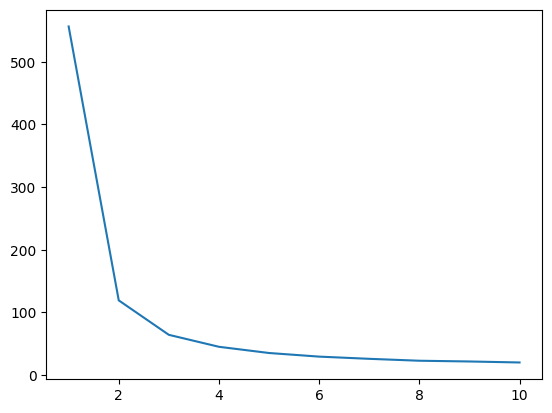

In [3]:
from mlkit.cluster import KMeans

model = KMeans(random_state=42)
model.test_n_clusters(X_train, upto=10)

In [4]:
from mlkit.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, verbose=1)
model.fit(X_train)
print(model.inertia_)
print(model.centroids_)
print(model.labels_)

100%|██████████| 10/10 [00:00<00:00, 30.41it/s]

64.0447342192691
[[6.83928571 3.08571429 5.75357143 2.11428571]
 [4.98604651 3.43488372 1.46744186 0.24883721]
 [5.92857143 2.75102041 4.41020408 1.44489796]]
[2 1 0 2 2 1 2 0 2 2 0 1 1 1 1 2 0 2 2 0 1 2 1 0 0 0 0 0 1 1 1 1 2 1 1 2 2
 1 1 1 2 2 2 1 1 2 2 0 2 0 2 0 2 1 0 2 1 1 1 2 2 1 1 1 2 1 2 0 1 2 2 1 2 2
 2 2 0 2 1 2 0 1 1 2 0 1 2 1 1 2 2 0 2 0 0 2 1 1 2 0 1 1 1 2 0 1 0 0 1 2 2
 2 2 0 1 0 2 0 2 2]


In [6]:
pd.crosstab(model.labels_, y_train)

col_0,0,1,2
row_0,,,
0,0,1,27
1,43,0,0
2,0,38,11


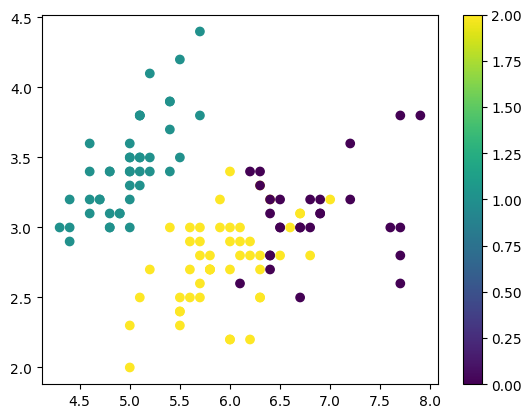

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model.labels_ are the cluster labels
# And X_train is the dataset

# Create a colormap (e.g., 'viridis', 'plasma', 'inferno', etc.)
cmap = plt.get_cmap('viridis')

# Normalize the cluster labels to map them to the colormap
norm = plt.Normalize(vmin=model.labels_.min(), vmax=model.labels_.max())

# Plot the scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=model.labels_, cmap=cmap, norm=norm)

# Add a color bar to show the label-to-color mapping
plt.colorbar()

plt.show()


In [10]:
test_preds = model.predict(X_test)

In [11]:
pd.crosstab(test_preds, y_test)

col_0,0,1,2
row_0,,,
0,0,1,9
1,7,0,0
2,0,10,3
